In [1]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv("Cricket.csv" , encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [19]:
#Data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [20]:
#As we observed span column is stored as object
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True) 
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [21]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [22]:
#now we will look for HS column
df2 = df['HS']

In [23]:
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [24]:
#Same we will do with HS column as it contains extra '*' mark
df[['HS','extra']] = df.HS.str.split("*",expand=True) 


In [25]:
df['HS']=df['HS'].astype(int)  #Type casting
df=df.drop(['extra'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [27]:
#Data managing and cleaning
#Now we will check null values and duplicate values in our dataset
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Exp       0
dtype: int64

In [28]:
df[df.duplicated()].sum()

Player    0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
Exp       0.0
dtype: float64

We dont have any null and duplicate values in our dataset

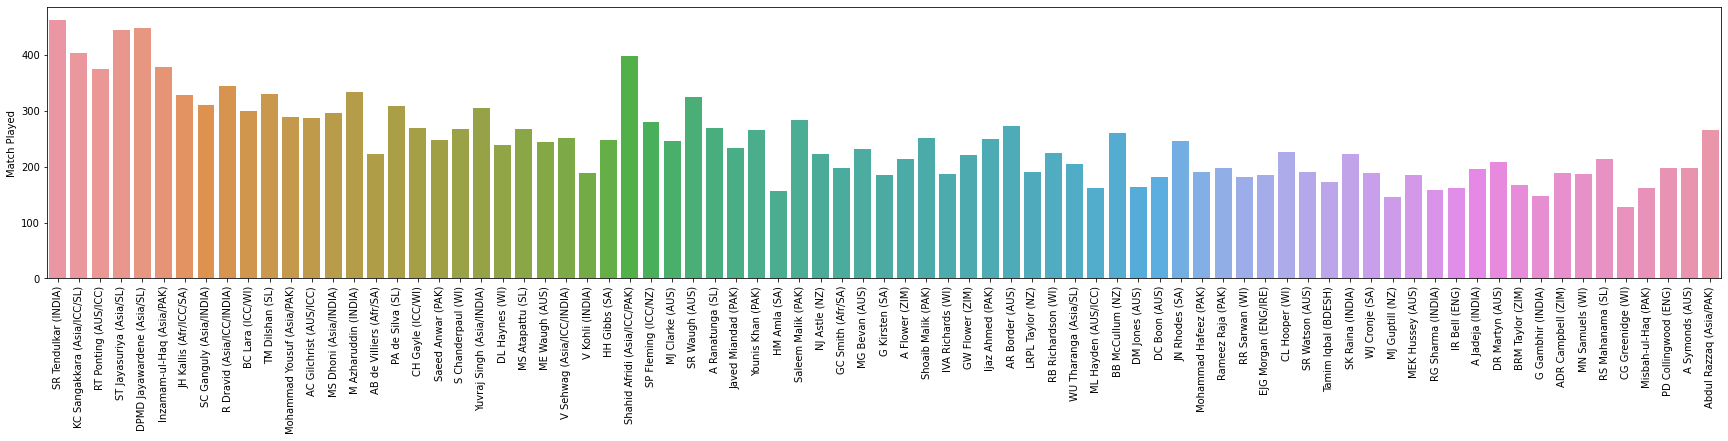

In [31]:
#Visualizing data 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,5))
mat = df[['Player','Mat']]
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

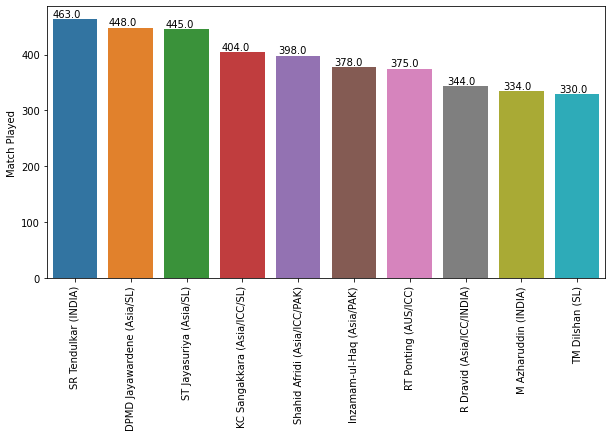

In [40]:
#Getting top 10 players according to matches played
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

In [41]:
col = df.columns

In [42]:
col

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

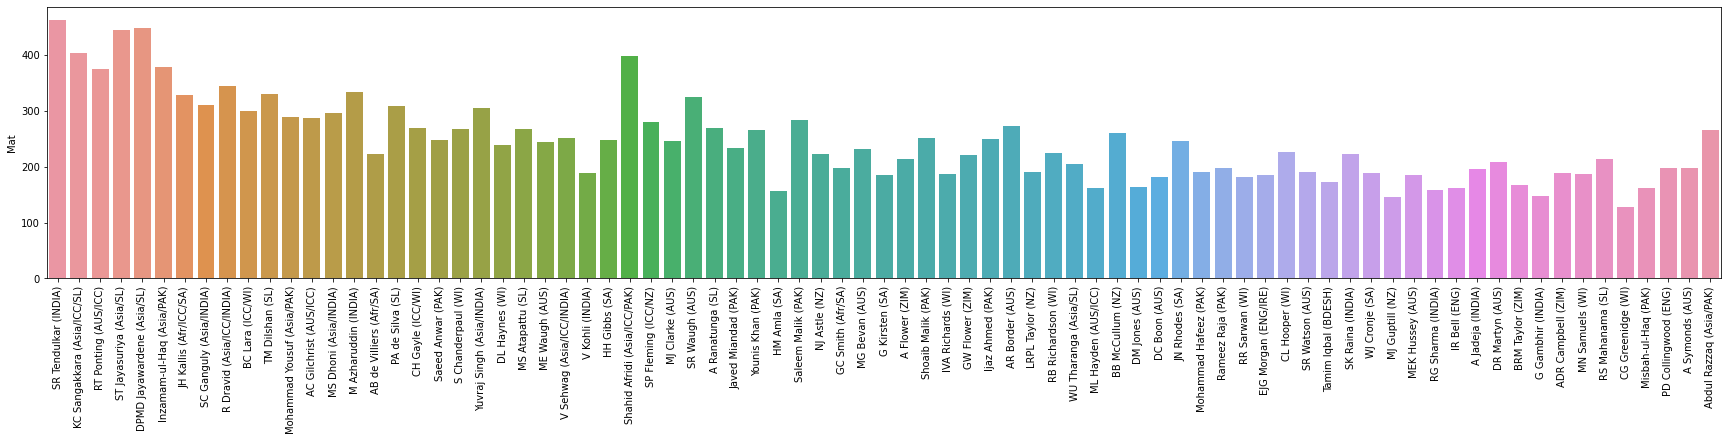

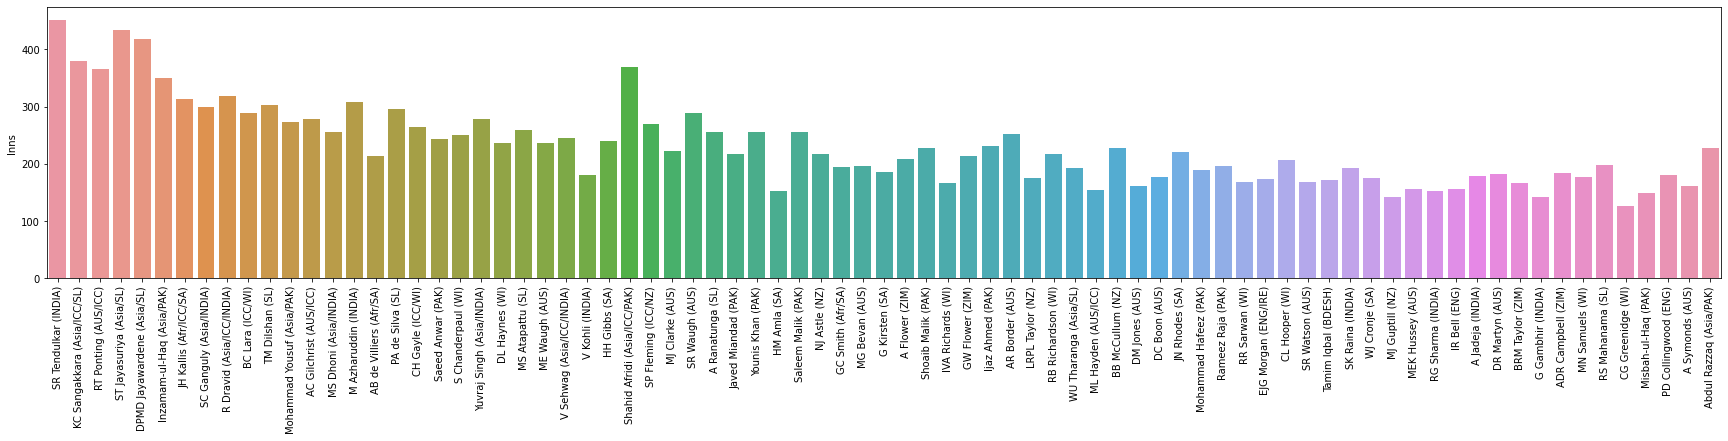

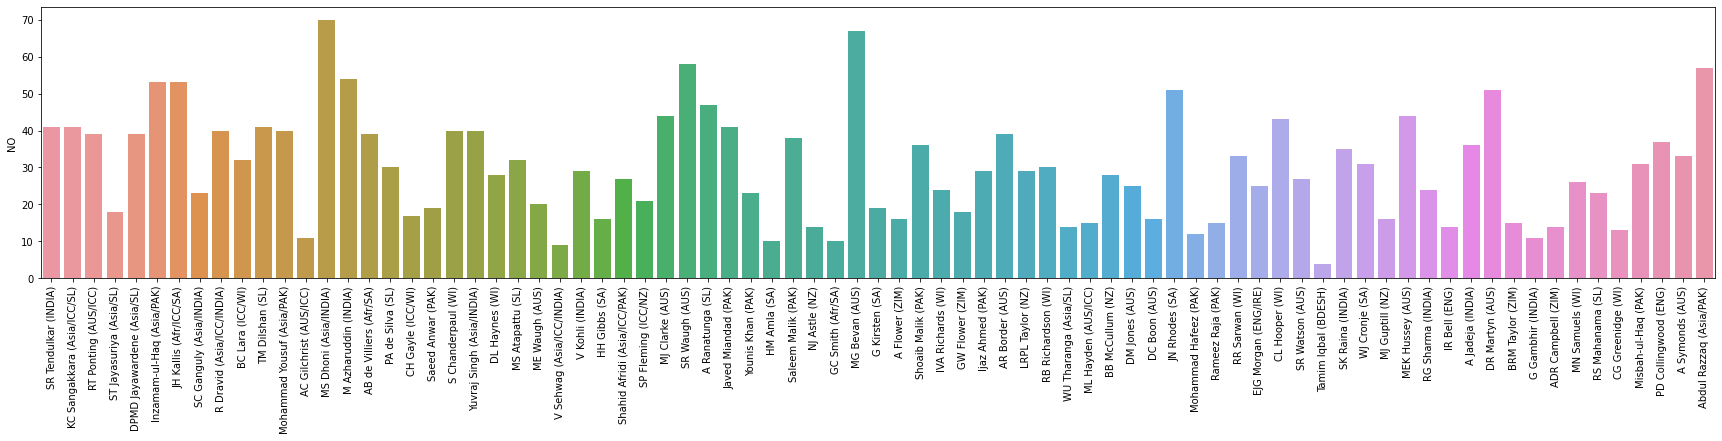

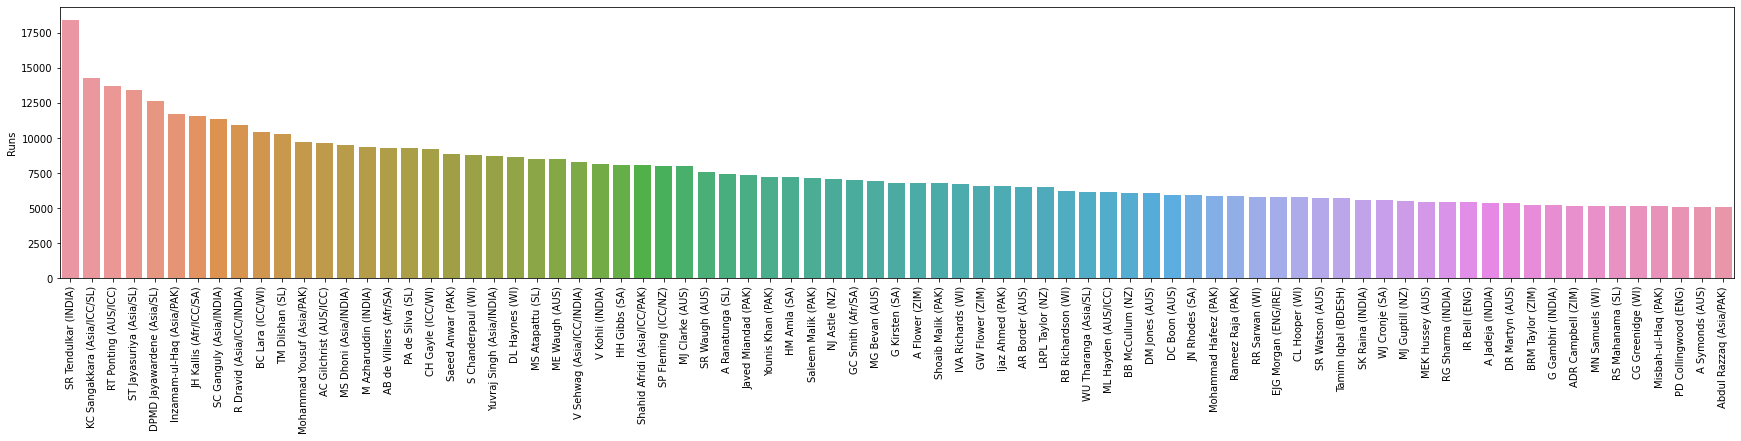

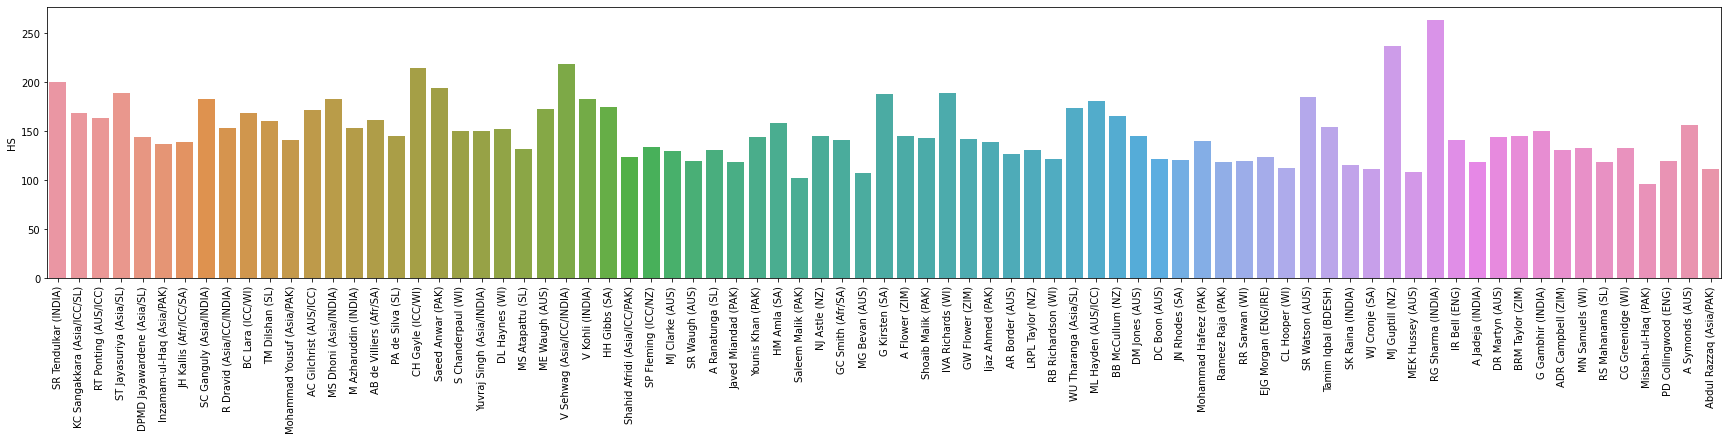

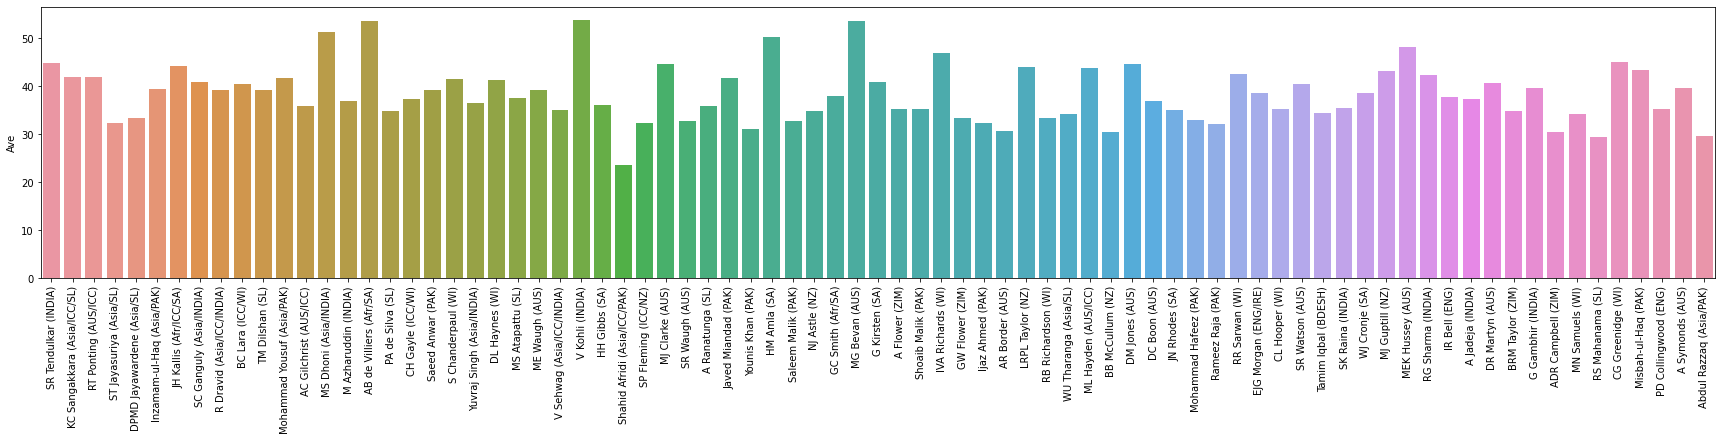

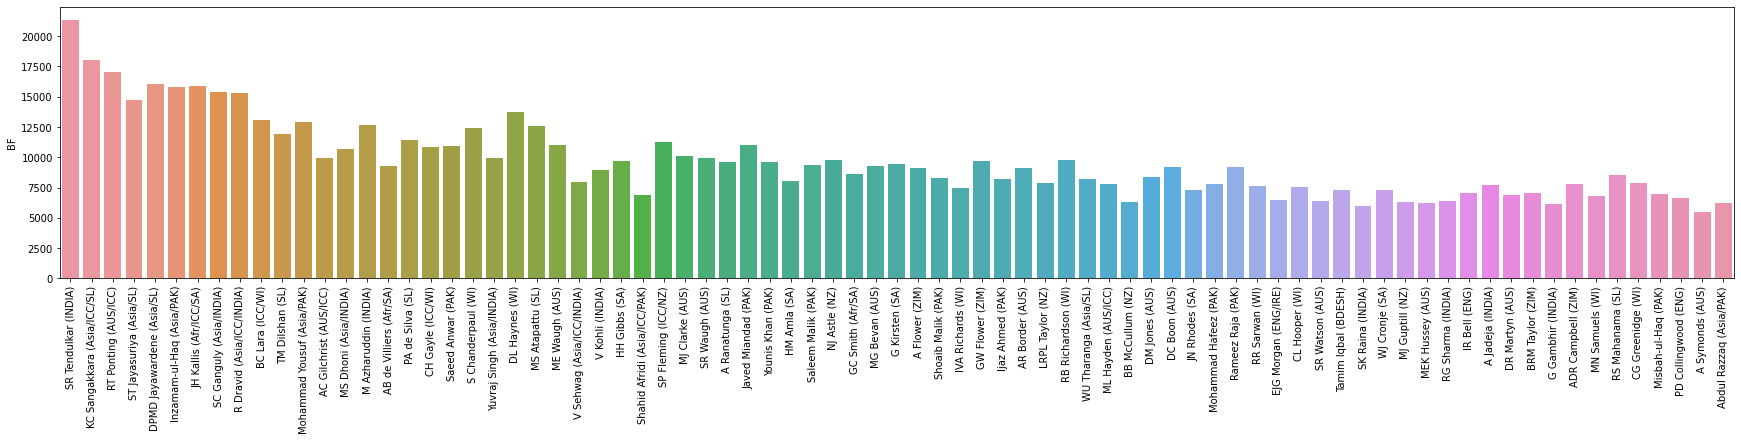

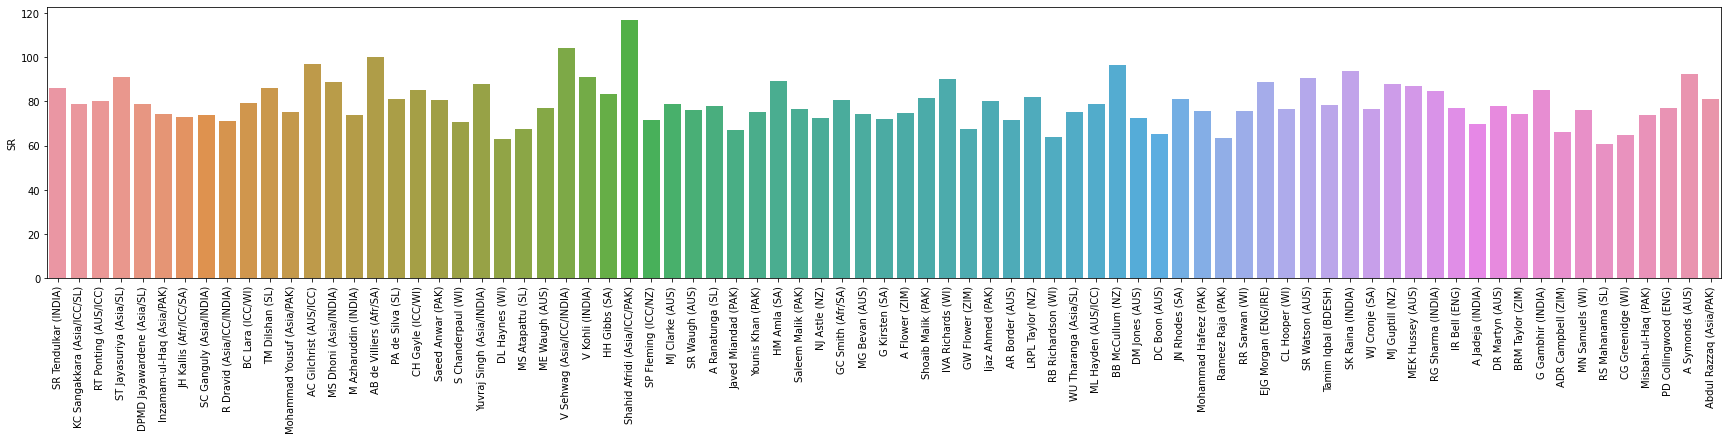

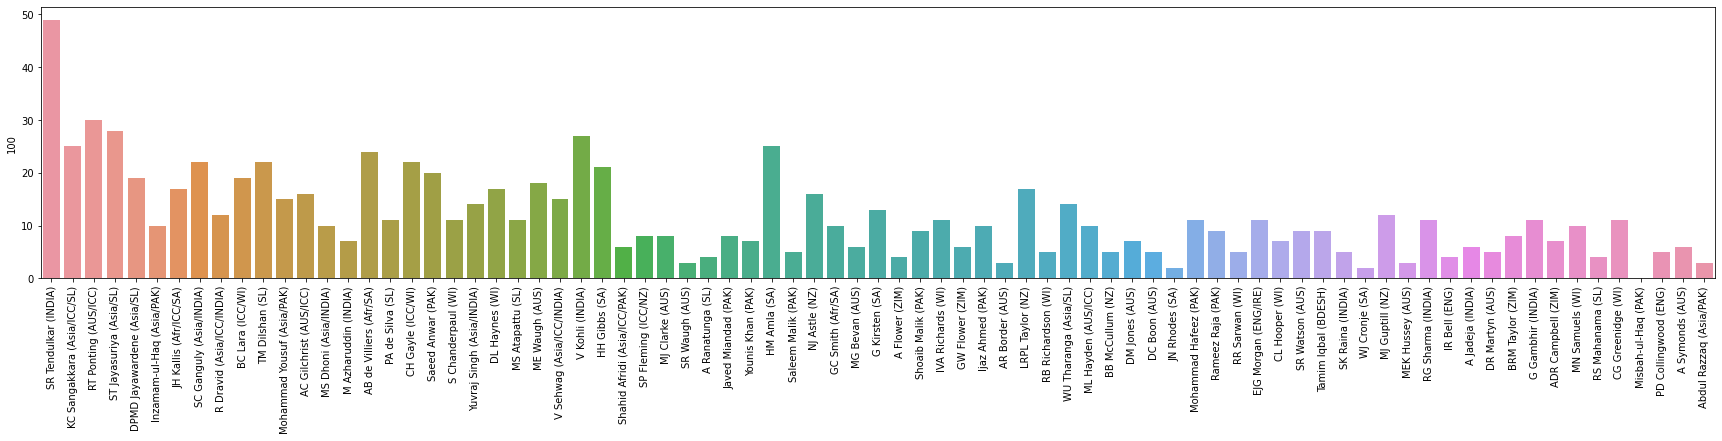

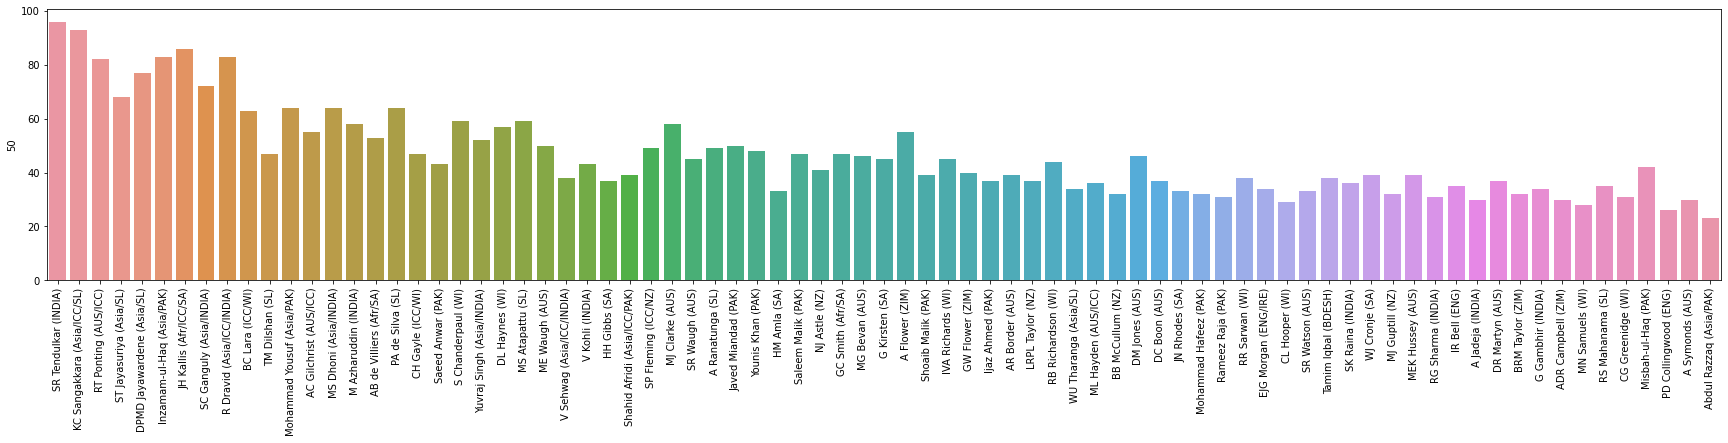

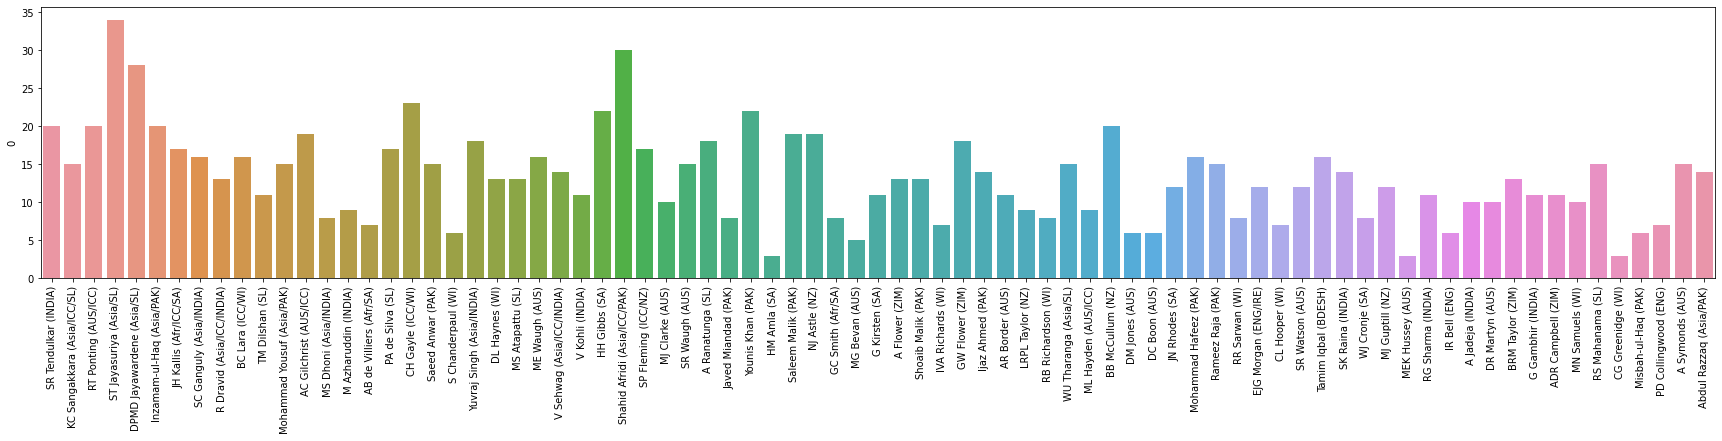

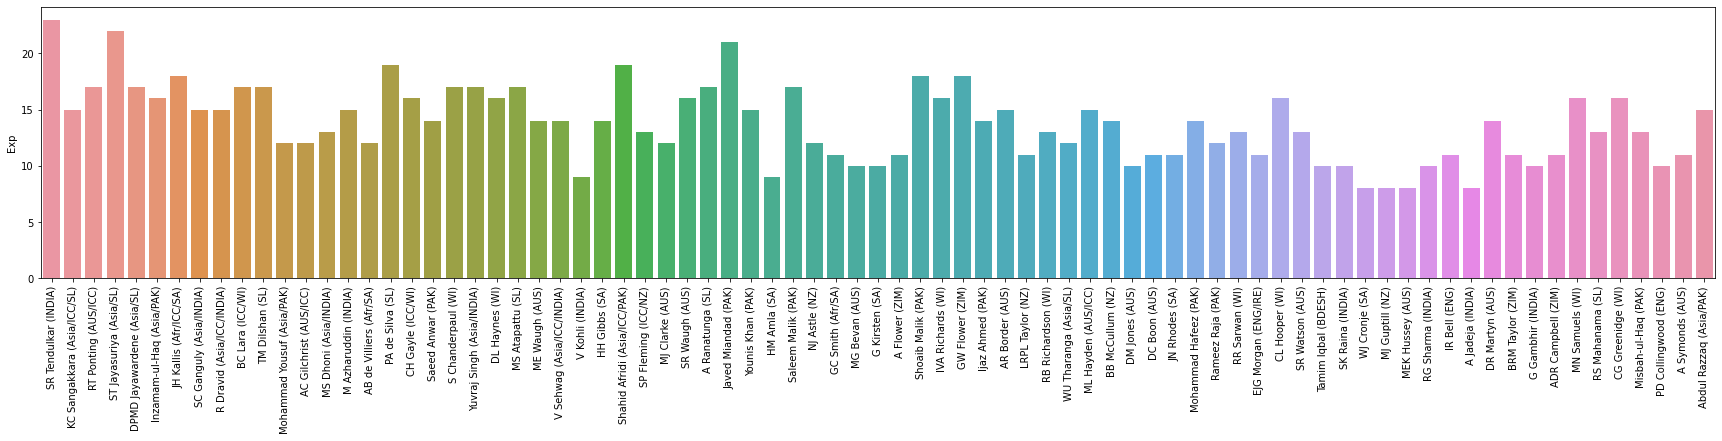

In [43]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.figure(figsize = (30,5))
        bf = df[['Player',col_name]]
        ax = sns.barplot(x='Player', y=col_name, data= bf)
        ax.set(xlabel = '', ylabel= col_name)
        plt.xticks(rotation=90)
        plt.show()
       

Getting top 10 players according to Mat played


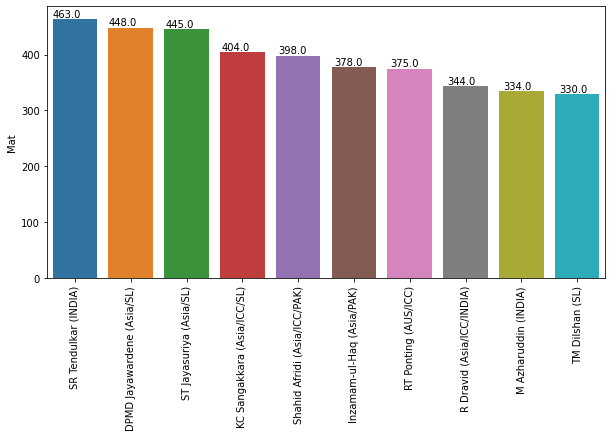

Getting top 10 players according to Inns played


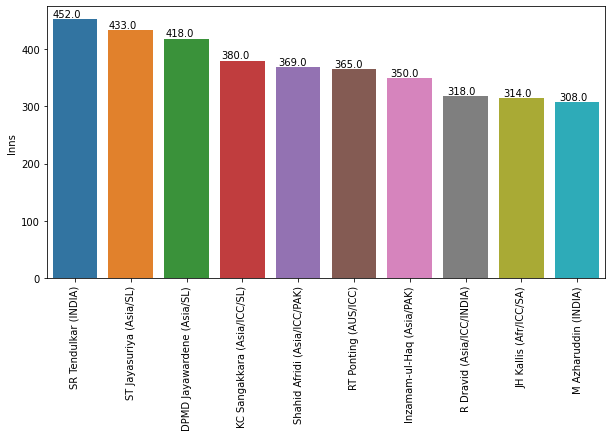

Getting top 10 players according to NO played


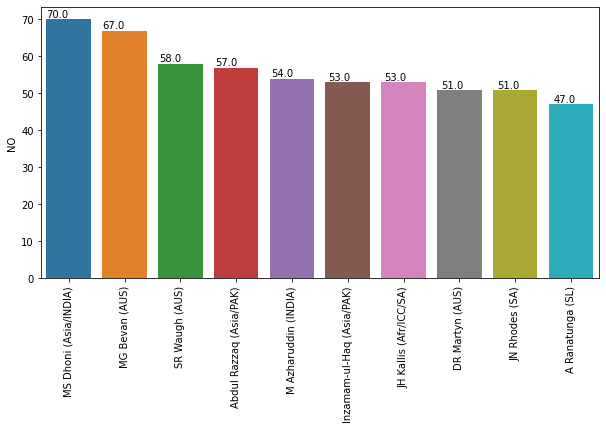

Getting top 10 players according to Runs played


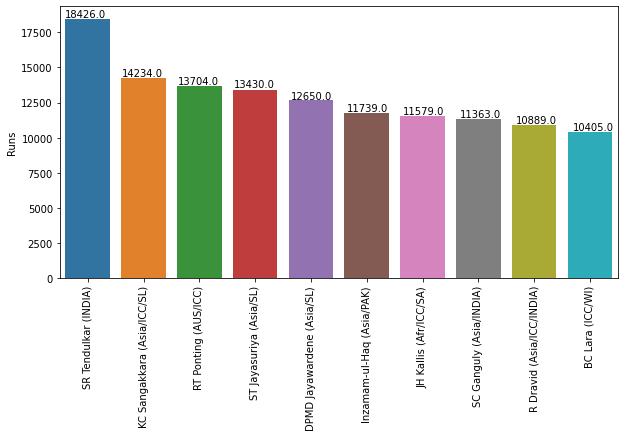

Getting top 10 players according to HS played


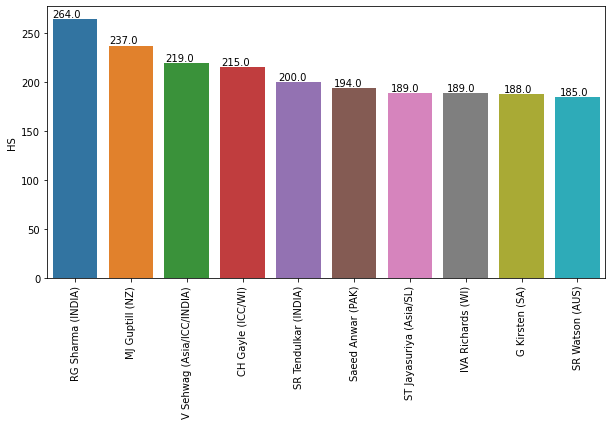

Getting top 10 players according to Ave played


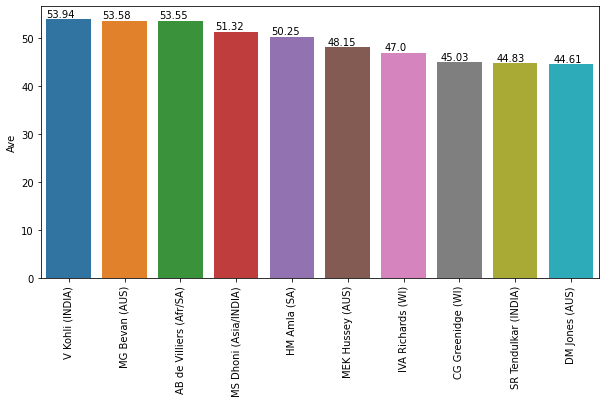

Getting top 10 players according to BF played


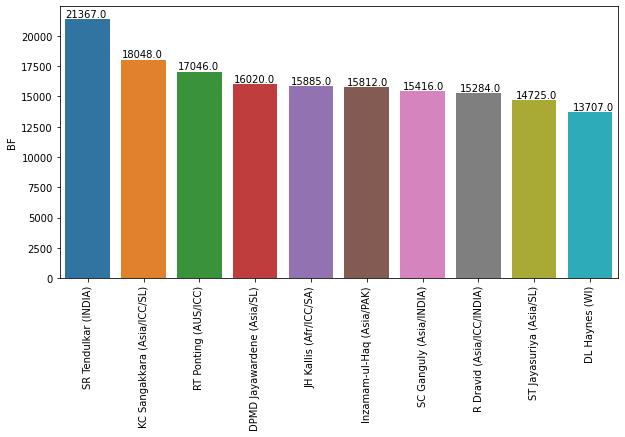

Getting top 10 players according to SR played


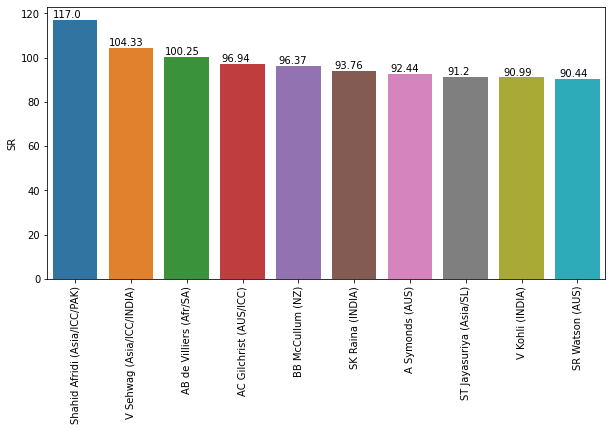

Getting top 10 players according to 100 played


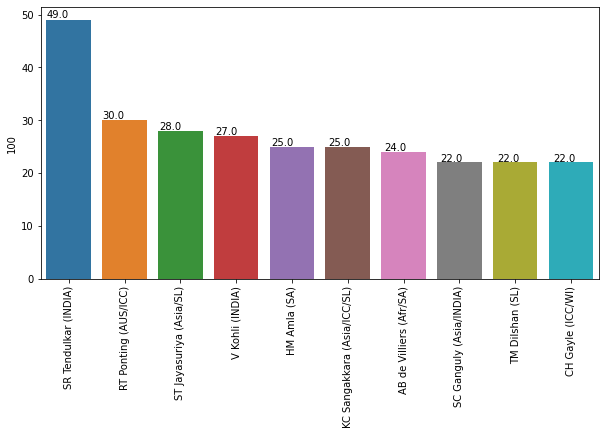

Getting top 10 players according to 50 played


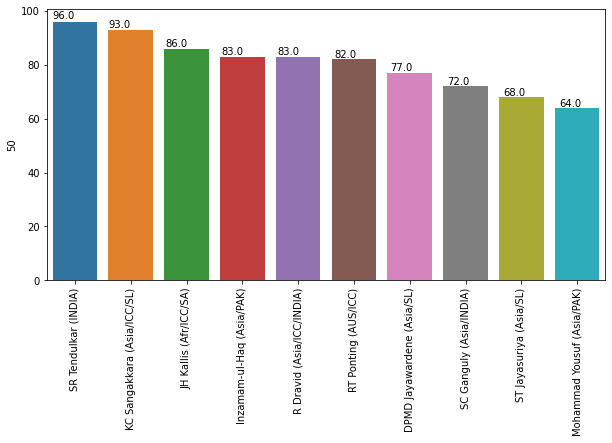

Getting top 10 players according to 0 played


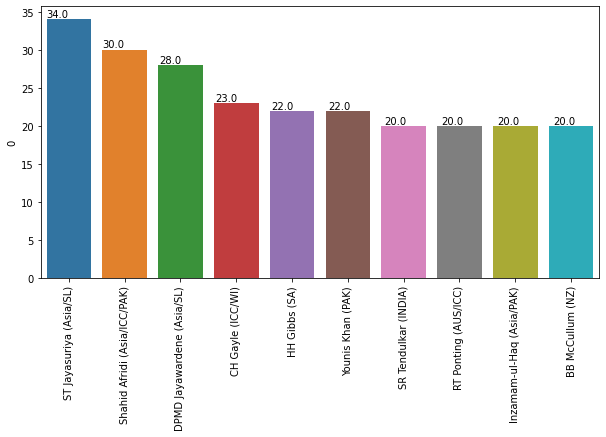

Getting top 10 players according to Exp played


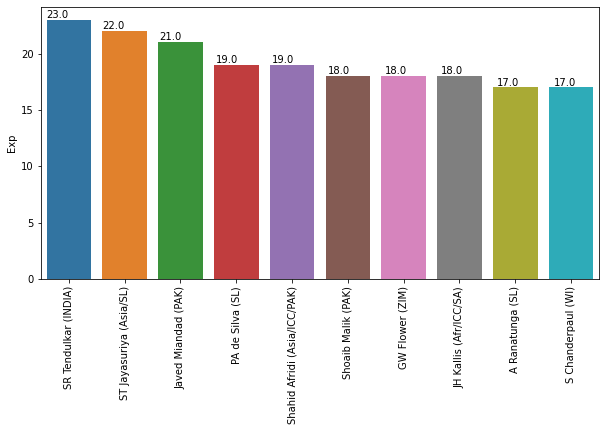

In [44]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.figure(figsize = (10,5))
        print("Getting top 10 players according to {col_name} played".format(col_name = col_name))
        bf_top10 = df[['Player',col_name]].sort_values(col_name, ascending = False).head(10)
        ax = sns.barplot(x='Player', y=col_name, data= bf_top10)
        for p in ax.patches:
           ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
        ax.set(xlabel = '', ylabel= col_name)
        plt.xticks(rotation=90)
        plt.show()

In [45]:
df.corr()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
Mat,1.000000,0.990661,0.433992,0.864500,0.089757,-0.204473,0.798576,0.183694,0.466574,0.777884,0.673924,0.687774
Inns,0.990661,1.000000,0.338788,0.896270,0.137518,-0.210776,0.838206,0.152891,0.530225,0.800381,0.697878,0.698699
NO,0.433992,0.338788,1.000000,0.260526,-0.312561,0.241971,0.275283,-0.019291,-0.121577,0.350533,-0.101977,0.233812
Runs,0.864500,0.896270,0.260526,1.000000,0.335049,0.172331,0.936736,0.146401,0.776243,0.914436,0.497139,0.589688
HS,0.089757,0.137518,-0.312561,0.335049,1.000000,0.250068,0.192006,0.388540,0.568856,0.180646,0.222399,0.051748
Ave,-0.204473,-0.210776,0.241971,0.172331,0.250068,1.000000,0.132089,0.098574,0.345500,0.240353,-0.536602,-0.238810
BF,0.798576,0.838206,0.275283,0.936736,0.192006,0.132089,1.000000,-0.196835,0.658980,0.933328,0.402524,0.584006
SR,0.183694,0.152891,-0.019291,0.146401,0.388540,0.098574,-0.196835,1.000000,0.257617,-0.047072,0.271291,0.000201
100,0.466574,0.530225,-0.121577,0.776243,0.568856,0.345500,0.658980,0.257617,1.000000,0.557369,0.338982,0.338881
50,0.777884,0.800381,0.350533,0.914436,0.180646,0.240353,0.933328,-0.047072,0.557369,1.000000,0.357128,0.505346


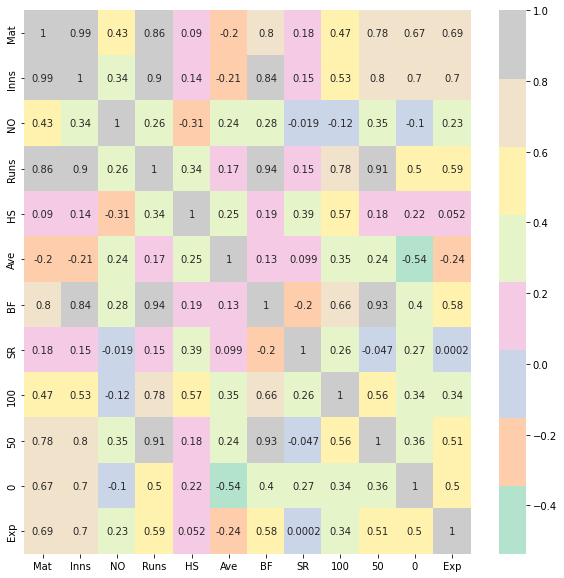

In [52]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="Pastel2")
plt.savefig('Correlation')
plt.show()

Mat and Inns are highly correlated with correlation of 0.99

Mat and Runs are highly correlated with correlation of 0.86

Runs and Inns are highly correlated with correlation of 0.90

In [53]:
#Outliers detection

df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,149.253165,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,31.285070,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,96.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,125.500000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,144.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,167.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,264.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000,23.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


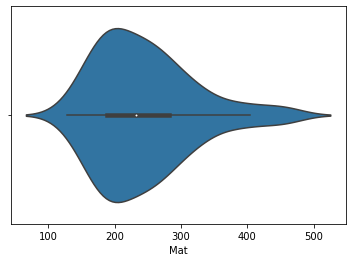

In [54]:
sns.violinplot(df['Mat'])

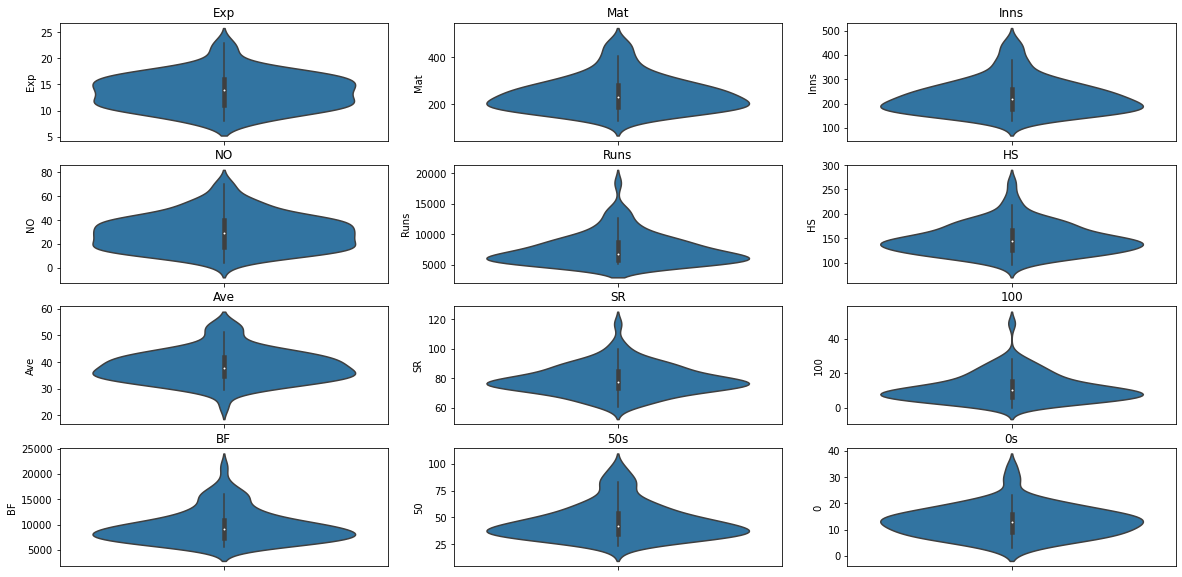

In [55]:
f, axes = plt.subplots(4,3, figsize=(20, 10))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')

s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')

s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')

s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')

s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')

s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')

s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')

s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')

s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')

s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [56]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

Q3 = df.Exp.quantile(0.99)
Q1 = df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3



<ipython-input-56-1c42ba4325e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']<=Q1]=Q1
<ipython-input-56-1c42ba4325e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']>=Q3]=Q3
<ipython-input-56-1c42ba4325e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inns'][df['Inns']<=Q1]=Q1
<ipython-input-56-1c42ba4325e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

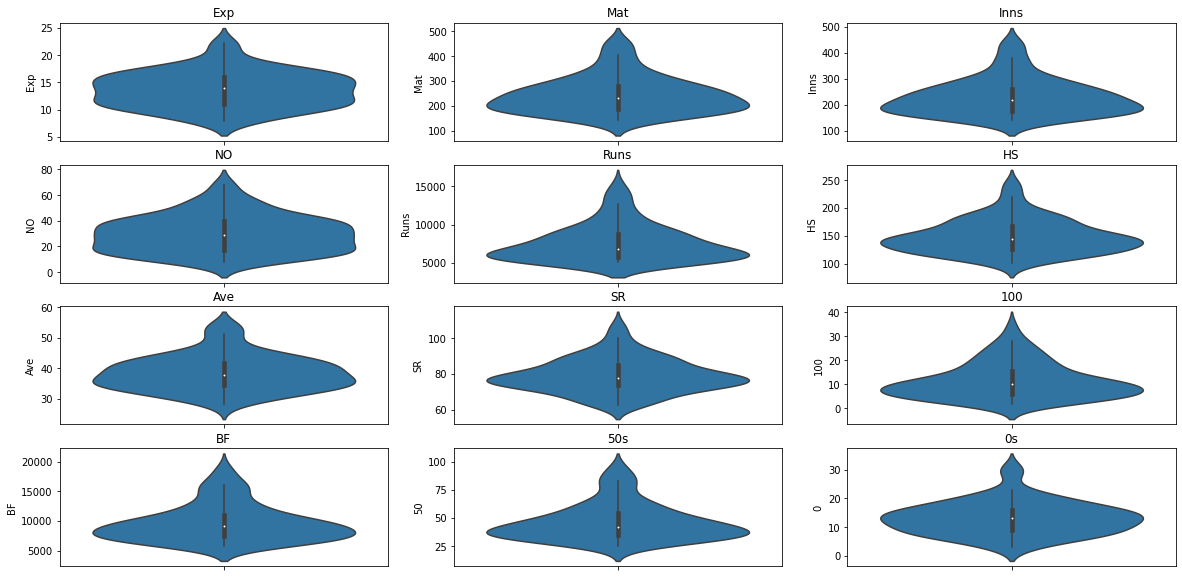

In [57]:
f, axes = plt.subplots(4,3, figsize=(20, 10))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')

s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')

s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')

s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')

s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')

s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')

s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')

s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')

s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')

s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [58]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [59]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [61]:
#Now let is rescale our data
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
pd.DataFrame(df_scaled) 

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.410967,-1.317905,-1.204129,-1.026055,-0.533462,1.123075,-0.571481,-1.520223,-0.053484,-0.958091,-1.773864,0.693555
75,-1.137714,-1.180084,0.066517,-1.031096,-1.607977,0.839339,-0.886324,-0.579875,-1.351026,-0.275647,-1.252838,-0.225857
76,-0.658565,-0.716822,0.490065,-1.043696,-0.965662,-0.560194,-0.994541,-0.235897,-0.878193,-1.268293,-1.079162,-1.145270
77,-0.644875,-1.006361,0.207700,-1.045377,0.231200,0.203979,-1.246769,1.410512,-0.740742,-1.020131,0.310242,-0.838799


In [62]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [63]:
#Now start KMeans
from sklearn.cluster import KMeans

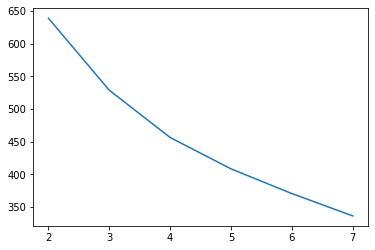

In [64]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []  #Within Cluster sum of squares (WCSS)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [65]:
#Looking at the above elbow curve it looks good to proceed with 4 clusters.If you want 3 you can go with that also.

In [66]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_df1)

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [67]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 3, 0, 1, 3, 1,
       1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [69]:
# Assign the label

df['Cluster_Id'] = cluster.labels_
df.head(20)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),451.3,437.18,41.00,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,2
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.00,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,2
2,RT Ponting (AUS/ICC),375.0,365.00,39.00,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,2
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.00,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,2
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.00,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,2
5,Inzamam-ul-Haq (Asia/PAK),378.0,350.00,53.00,11739.00,137.0,39.52,15812.00,74.24,10.00,83.00,20.00,16.00,2
6,JH Kallis (Afr/ICC/SA),328.0,314.00,53.00,11579.00,139.0,44.36,15885.00,72.89,17.00,86.00,17.00,18.00,2
7,SC Ganguly (Asia/INDIA),311.0,300.00,23.00,11363.00,183.0,41.02,15416.00,73.70,22.00,72.00,16.00,15.00,2
8,R Dravid (Asia/ICC/INDIA),344.0,318.00,40.00,10889.00,153.0,39.16,15284.00,71.24,12.00,83.00,13.00,15.00,2
9,BC Lara (ICC/WI),299.0,289.00,32.00,10405.00,169.0,40.48,13086.00,79.51,19.00,63.00,16.00,17.00,1


In [70]:
## Number of countries in each cluster
df.Cluster_Id.value_counts(ascending=True)

2     9
3    11
1    27
0    32
Name: Cluster_Id, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Ave, NO, SR are some important factors which decides the form of a player. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [71]:
df[['NO','Ave','SR','Cluster_Id']].groupby('Cluster_Id').mean()

,NO,Ave,SR
Cluster_Id,,,
0,28.403125,38.022188,76.319237
1,31.074074,35.942874,78.861015
2,38.555556,39.847778,78.634444
3,25.423636,45.625382,88.840000


In [72]:
df[df['Cluster_Id']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
3,ST Jayasuriya (Asia/SL),445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,30.88,22.0,2
7,SC Ganguly (Asia/INDIA),311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.00,15.0,2
2,RT Ponting (AUS/ICC),375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.00,17.0,2
4,DPMD Jayawardene (Asia/SL),448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.00,17.0,2
8,R Dravid (Asia/ICC/INDIA),344.0,318.0,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.00,15.0,2


In [73]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
60,Tamim Iqbal (BDESH),173.00,171.00,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,0
37,GC Smith (Afr/SA),197.00,194.00,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,0
70,G Gambhir (INDIA),147.00,143.00,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,0
54,Mohammad Hafeez (PAK),190.00,190.00,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,0
74,CG Greenidge (WI),142.04,139.48,13.0,5134.0,133.0,45.03,7908.0,64.92,11.0,31.0,3.0,16.0,0


In [74]:
df[df['Cluster_Id']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,1
36,NJ Astle (NZ),223.0,217.0,14.0,7090.0,145.0,34.92,9760.0,72.64,16.0,41.0,19.0,12.0,1
26,HH Gibbs (SA),248.0,240.0,16.0,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,22.0,14.0,1
17,CH Gayle (ICC/WI),269.0,264.0,17.0,9221.0,215.0,37.33,10834.0,85.11,22.0,47.0,23.0,16.0,1
43,GW Flower (ZIM),221.0,214.0,18.0,6571.0,142.0,33.52,9723.0,67.58,6.0,40.0,18.0,18.0,1


In [75]:
df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
24,V Sehwag (Asia/ICC/INDIA),251.0,245.0,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,3
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,3
49,ML Hayden (AUS/ICC),161.0,155.0,15.0,6133.0,181.0,43.80,7767.0,78.96,10.0,36.0,9.0,15.0,3
63,MJ Guptill (NZ),146.0,143.0,16.0,5500.0,237.0,43.30,6269.0,87.73,12.0,32.0,12.0,8.0,3
39,G Kirsten (SA),185.0,185.0,19.0,6798.0,188.0,40.95,9436.0,72.04,13.0,45.0,11.0,10.0,3
